# Head

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('clustering/')

from utils import *

# HDBSCAN

In [3]:
import os
import pandas as pd

cluster_df = pd.read_parquet(os.path.join(get_data_dir(), "2010s", "cluster_df.parquet"))
cluster_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance
VID,,,,,,,,,
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758
...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660


In [ ]:
import os
import pickle

d, w = 100, 10
start_year, end_year = 2010, 2021

with open(os.path.join(get_data_dir(), "2010s", "vectors.pkl"), 'rb') as f:
        vectors = pickle.load(f)

data_dir:  /home/lyuzhuoqi/projects/clustering/data


In [ ]:
from sklearn.cluster import HDBSCAN

method = "HDBSCAN"

hdb = HDBSCAN(n_jobs=-1, 
              metric='cosine', 
              store_centers='medoid',
              min_cluster_size=50).fit(vectors)

with open(os.path.join(get_data_dir(), "2010s", f'cluster_labels_{method}.pkl'), 'wb') as f:
        pickle.dump(hdb.labels_,f)
with open(os.path.join(get_data_dir(), "2010s", f'cluster_centers_{method}.pkl'), 'wb') as f:
        pickle.dump(hdb.medoids_, f)

data_dir:  /home/lyuzhuoqi/projects/clustering/data
data_dir:  /home/lyuzhuoqi/projects/clustering/data


In [10]:
with open(os.path.join(get_data_dir(), "2010s", 'wv'), 'rb') as f:
    wv = pickle.load(f)
all_VIDs = wv.index_to_key
valid_VID_idx = [all_VIDs.index(vid) for vid in cluster_df.index]
len(valid_VID_idx)

data_dir:  /home/lyuzhuoqi/projects/clustering/data


20038

In [17]:
import pickle

with open(os.path.join(get_data_dir(), "2010s", f'cluster_labels_{method}.pkl'), 'rb') as f:
        hdb_labels = pickle.load(f)

cluster_df["HDBSCAN_label"] = hdb_labels[valid_VID_idx]
cluster_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,HDBSCAN_label
VID,,,,,,,,,,
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,-1
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,-1
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,-1
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,-1
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,0
...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,-1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,0
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,0


<Axes: xlabel='HDBSCAN_label', ylabel='Count'>

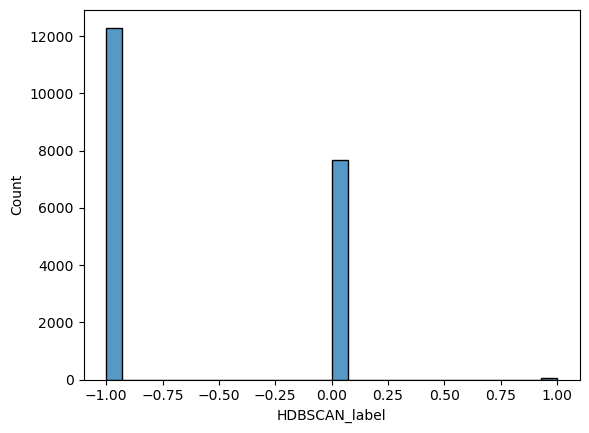

In [ ]:
import seaborn as sns

sns.histplot(cluster_df["HDBSCAN_label"])

# DBSCAN

In [53]:
from sklearn.cluster import DBSCAN

method = "HDBSCAN"

db = DBSCAN(n_jobs=-1, 
            metric='cosine',
            eps=0.5,
            min_samples=50).fit(vectors)

with open(os.path.join(get_data_dir(), "2010s", f'cluster_labels_{method}.pkl'), 'wb') as f:
        pickle.dump(db.labels_,f)
with open(os.path.join(get_data_dir(), "2010s", f'cluster_centers_{method}.pkl'), 'wb') as f:
        pickle.dump(vectors[db.core_sample_indices_], f)

data_dir:  /home/lyuzhuoqi/projects/clustering/data
data_dir:  /home/lyuzhuoqi/projects/clustering/data


In [ ]:
with open(os.path.join(get_data_dir(), "2010s", 'wv'), 'rb') as f:
    wv = pickle.load(f)
all_VIDs = wv.index_to_key
valid_VID_idx = [all_VIDs.index(vid) for vid in cluster_df.index]
len(valid_VID_idx)

In [54]:
import pickle

with open(os.path.join(get_data_dir(), "2010s", f'cluster_labels_{method}.pkl'), 'rb') as f:
        labels = pickle.load(f)

cluster_df["DBSCAN_label"] = labels[valid_VID_idx]
cluster_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,HDBSCAN_label,DBSCAN_label
VID,,,,,,,,,,,
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,-1,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,-1,0
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,-1,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,-1,0
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,-1,0
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,0,0
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,0,0


<Axes: xlabel='DBSCAN_label', ylabel='Count'>

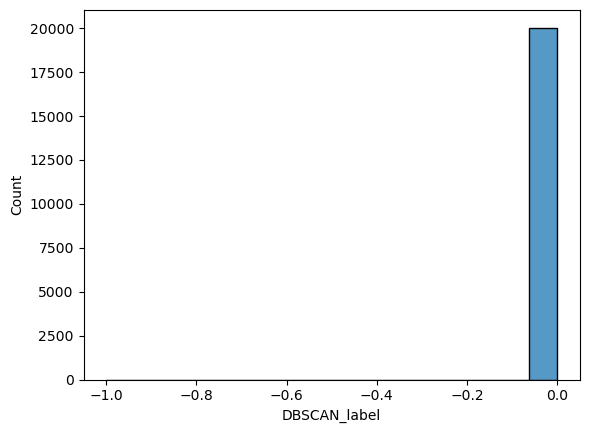

In [55]:
import seaborn as sns

sns.histplot(cluster_df["DBSCAN_label"])